Question #3 (100 points):
Implement the gaussian process for approximating a random function and briefly explain the procedure. 
The choice of the function is up to you.

First the linear space and the function 9sin(x)^4 - 22sin(x)^3 + 4sin(x)^2 - 13*sin(x) + 20 are defined and plotted.

Text(0, 0.5, '$f(x)$')

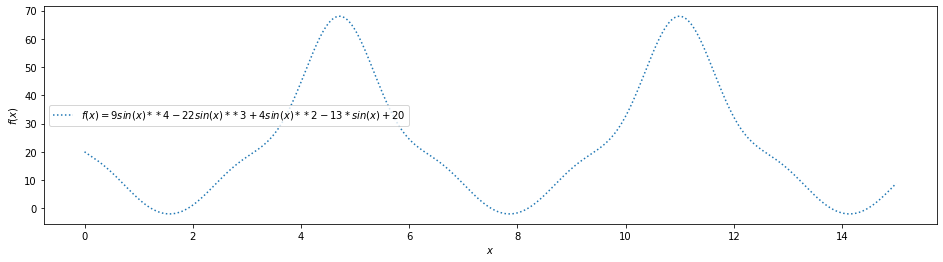

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(start = 0, stop = 15, num = 1000).reshape(-1, 1)
y = np.squeeze(9*np.sin(x)**4 - 22*np.sin(x)**3 + 4*np.sin(x)**2 - 13*np.sin(x) + 20)

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)

plt.plot(x, y, label=r'$f(x) = 9sin(x)**4 - 22sin(x)**3 + 4sin(x)**2 - 13*sin(x) + 20$', linestyle = "dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

Then it defines the number of points to approximate and the percentage of confidence by user input (the default values are 6 and 50 respectively).The points are chosen randomly, then it defines the RBF kernel and pass it to the GP regressor along with the number of points. The GP is then fit to the data and makes a mean prediction and a standard prediction. Last, the original function and the predictions are plotted, highlighting the confidence interval.

Enter the number of points to approximate: 6
Enter the percentage of confidence: 50
PC: 1.5


Text(0, 0.5, '$f(x)$')

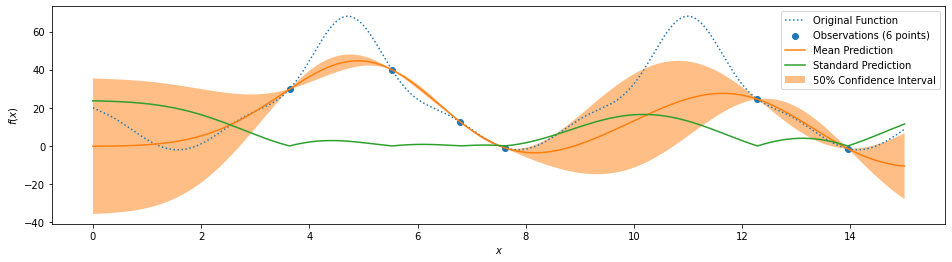

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler

points = int(input("Enter the number of points to approximate: "))
if points <= 0:
    points = 6
confidence = int(input("Enter the percentage of confidence: "))
if confidence <= 0:
    confidence = 50
prediction_confidence = 1 + confidence / 100
print("PC:", prediction_confidence)

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size = points, replace = False)
x_train, y_train = x[training_indices], y[training_indices]

kernel = 1 * RBF(length_scale = 1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel = kernel, n_restarts_optimizer = points)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(x, return_std=True)

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4)

plt.plot(x, y, label="Original Function", linestyle = "dotted")
plt.scatter(x_train, y_train, label = "Observations (" + str(points) + " points)")
plt.plot(x, mean_prediction, label = "Mean Prediction")
plt.plot(x, std_prediction, label = "Standard Prediction")
plt.fill_between(x.ravel(), mean_prediction - prediction_confidence * std_prediction, mean_prediction + 
                 prediction_confidence * std_prediction, alpha = 0.5, 
                 label =  str(confidence) + "% Confidence Interval")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")